<a href="https://colab.research.google.com/github/mihaijulien/covid19/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# TASK 2 : Clone & Explore dataset

In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.83 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
main_dir = "/content/datasets/Data"
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:5])
train_normal_names = os.listdir(train_normal_dir)

['COVID19(137).jpg', 'COVID19(69).jpg', 'COVID19(52).jpg', 'COVID19(475).jpg', 'COVID19(143).jpg']


In [5]:
print('Total images in trainining set: ', len(train_covid_names + train_normal_names))

Total images in trainining set:  1811


# TASK 3 : Data Visualization

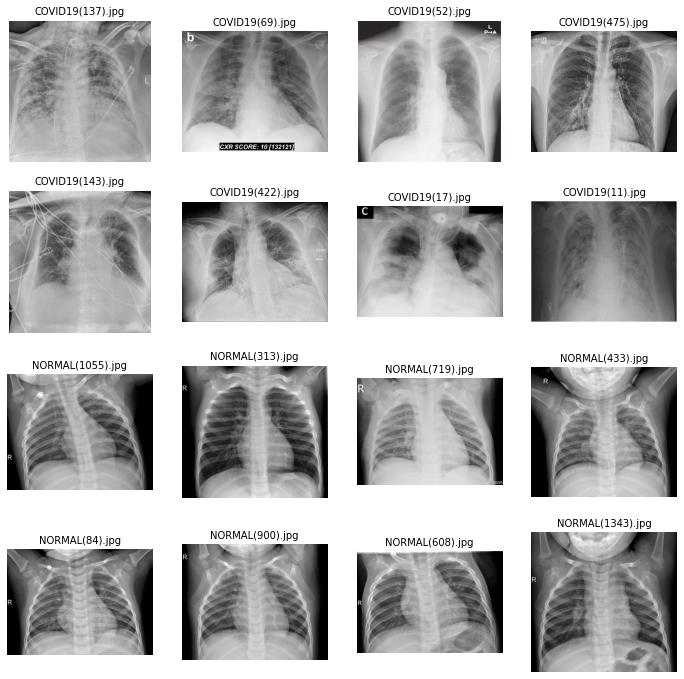

In [6]:
plt.figure(figsize=(12,12))
COL = 4
ROW = 4
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(ROW, COL, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [7]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size=(150,150),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=(150,150),
                                                      subset='validation',
                                                      batch_size = 32,
                                                      class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# TASK 6 : Compile & Train the Model

In [12]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 50s 1s/step - loss: 1.7737 - accuracy: 0.6860 - val_loss: 0.3912 - val_accuracy: 0.8729
Epoch 2/30
46/46 [==============================] - 50s 1s/step - loss: 0.3121 - accuracy: 0.8758 - val_loss: 0.1995 - val_accuracy: 0.9503
Epoch 3/30
46/46 [==============================] - 50s 1s/step - loss: 0.2344 - accuracy: 0.9103 - val_loss: 0.1760 - val_accuracy: 0.9503
Epoch 4/30
46/46 [==============================] - 50s 1s/step - loss: 0.1863 - accuracy: 0.9275 - val_loss: 0.3268 - val_accuracy: 0.9420
Epoch 5/30
46/46 [==============================] - 50s 1s/step - loss: 0.1838 - accuracy: 0.9420 - val_loss: 0.2284 - val_accuracy: 0.9558
Epoch 6/30
46/46 [==============================] - 50s 1s/step - loss: 0.1569 - accuracy: 0.9489 - val_loss: 0.1228 - val_accuracy: 0.9530
Epoch 7/30
46/46 [==============================] - 50s 1s/step - loss: 0.1369 - accuracy: 0.9551 - val_loss: 0.1217 - val_accuracy: 0.9669
Epoch 8/30
46/46 [==

# TASK 7 : Performance Evaluation

In [18]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

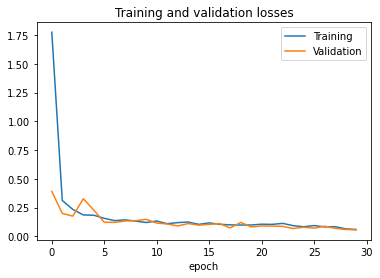

In [20]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

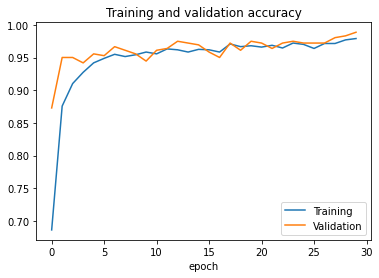

In [21]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [22]:
model.save("covid_detection.h5")

In [23]:
from google.colab import files

files.download('covid_detection.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:{} test acc:{}'.format(test_loss, test_acc))

16/16 [==============================] - 10s 641ms/step - loss: 0.1263 - accuracy: 0.9566
Test loss:0.12633806467056274 test acc:0.9566115736961365


# TASK 8 : Prediction On New Data

In [25]:
from keras.preprocessing import image

uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if (prediction == 0):
    print('covid detected')
  else:
    print('report is normal')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
covid1.jpg
covid detected
covid2.jpeg
covid detected
normal1.jpg
report is normal
normal2.jpg
report is normal
